In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
spotipy = pd.read_csv('spotipy.csv')
spotipy.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Renaming columns for easier referencing
spotipy.rename(columns={
    'track_id': 'id',
    'album_name': 'album',
    'track_name': 'track',
    'duration_ms': 'duration',
    'track_genre': 'genre'
}, inplace=True)

# Dropping genres that are not relevant for classification
spotipy = spotipy[~spotipy['genre'].isin(['comedy', 'classical', 'piano', 'opera'])]

# Dropping redundant index column and inaccurate time signature column
spotipy.drop(columns=['Unnamed: 0', 'time_signature'], inplace=True)


In [6]:
# Properly labelling categorical variables
keymap = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}
spotipy['key'] = spotipy['key'].map(keymap)

modemap = {
    0: 'Major',
    1: 'Minor'
}
spotipy['mode'] = spotipy['mode'].map(modemap)

In [7]:
# Basic information about the dataset
spotipy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                110000 non-null  object 
 1   artists           109999 non-null  object 
 2   album             109999 non-null  object 
 3   track             109999 non-null  object 
 4   popularity        110000 non-null  int64  
 5   duration          110000 non-null  int64  
 6   explicit          110000 non-null  bool   
 7   danceability      110000 non-null  float64
 8   energy            110000 non-null  float64
 9   key               110000 non-null  object 
 10  loudness          110000 non-null  float64
 11  mode              110000 non-null  object 
 12  speechiness       110000 non-null  float64
 13  acousticness      110000 non-null  float64
 14  instrumentalness  110000 non-null  float64
 15  liveness          110000 non-null  float64
 16  valence           110000 

In [8]:
# Dropping null observations
spotipy = spotipy[spotipy['tempo'] != 0] # Rows where tempo == 0 (impossible or inaccurate)
print(spotipy.isnull().sum())
spotipy.dropna(inplace=True)

id                  0
artists             1
album               1
track               1
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [9]:
# Summary statistics of the dataset
spotipy.describe().round(3)

,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000,109844.000
mean,33.464,228257.162,0.573,0.652,-7.983,0.080,0.297,0.149,0.210,0.480,122.830
std,22.375,104675.605,0.171,0.244,4.643,0.081,0.321,0.302,0.185,0.258,29.437
min,0.000,15800.000,0.051,0.000,-46.591,0.022,0.000,0.000,0.009,0.000,30.200
25%,17.000,175066.000,0.463,0.486,-9.738,0.036,0.015,0.000,0.098,0.267,99.984
50%,35.000,213173.000,0.585,0.693,-6.894,0.049,0.154,0.000,0.132,0.471,122.704
75%,50.000,261426.000,0.699,0.857,-4.940,0.084,0.556,0.039,0.271,0.688,140.400
max,100.000,5237295.000,0.985,1.000,4.532,0.957,0.996,1.000,1.000,0.995,243.372


In [10]:
# Checking for duplicate tracks
print(spotipy.duplicated(subset=['id']).sum())
spotipy[spotipy.duplicated(subset=['id'])].sort_values(by='id') # Genre differs, popularity is the same
# To strengthen the model's training, we will keep all observations

23480


,id,artists,album,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,C#,-6.644,Major,0.1070,0.316000,0.000001,0.1170,0.406,143.064,soul
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,D,-4.589,Minor,0.0758,0.019400,0.088100,0.3290,0.700,183.571,ska
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,C#,-5.230,Minor,0.0747,0.001210,0.000000,0.0995,0.236,148.033,rock
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,C#,-5.230,Minor,0.0747,0.001210,0.000000,0.0995,0.236,148.033,alternative
94239,004h8smbIoAkUNDJvVKwkG,Ouse;Powfu,Loners Diary,Lovemark,58,219482,True,0.808,0.331,F,-13.457,Minor,0.0557,0.131000,0.000000,0.2250,0.337,140.035,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89274,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,G#,-3.718,Minor,0.0913,0.127000,0.000000,0.1140,0.560,105.016,reggaeton
107898,7zumacGldlmxpoP8bpaeLe,Squeeze,Greatest Hits,Slap & Tickle,24,256839,False,0.585,0.805,B,-14.211,Major,0.0344,0.007390,0.000828,0.0699,0.919,131.820,synth-pop
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,C#,-5.412,Minor,0.0558,0.000005,0.859000,0.0730,0.677,133.987,metalcore
91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,G,-6.099,Major,0.0542,0.186000,0.079100,0.1520,0.387,88.036,rock


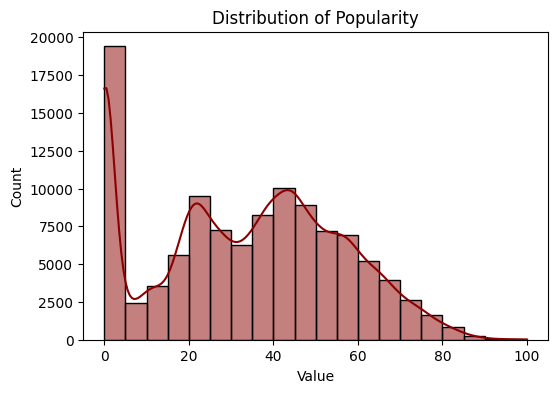

In [11]:
# Distribution of popularity (0-100)
plt.figure(figsize=(6, 4))
sns.histplot(
    data=spotipy, 
    x="popularity", 
    bins=20,
    color='#8b0000', 
    kde=True
)
plt.title('Distribution of Popularity')
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('popularity_distribution_0100.png', bbox_inches='tight')

Text(0, 0.5, 'Count')

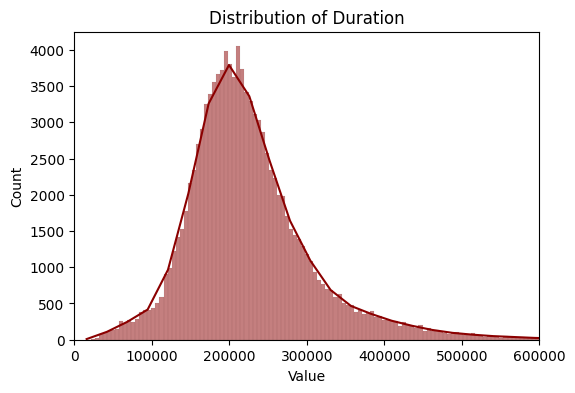

In [12]:
# Distribution of duration_ms
plt.figure(figsize=(6, 4))
sns.histplot(
    data=spotipy, 
    x="duration", 
    bins=1000,
    color='#8b0000', 
    kde=True
)
plt.xlim(0, 600000)  # Limiting x-axis for better visibility
plt.title('Distribution of Duration')
plt.xlabel('Value')
plt.ylabel('Count')

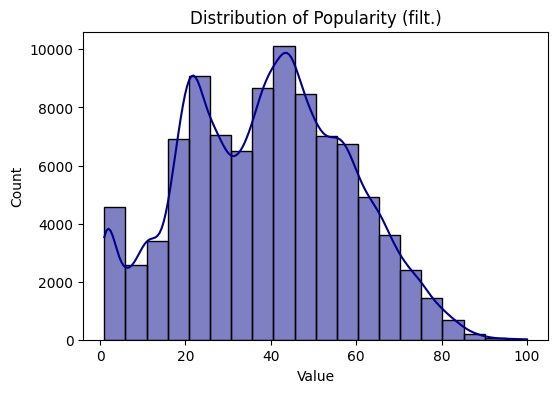

In [14]:
# Distribution of popularity (1-100)
plt.figure(figsize=(6, 4))
sns.histplot(
    data=spotipy[spotipy['popularity'] != 0], 
    x='popularity', 
    bins=20, 
    color='#00008b', 
    kde=True
)
plt.title('Distribution of Popularity (filt.)')
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('popularity_distribution.png', bbox_inches='tight')
plt.show()

In [15]:
# Dropping tracks with popularity equal to 0 to address skewness
spotipy = spotipy[spotipy['popularity'] != 0]

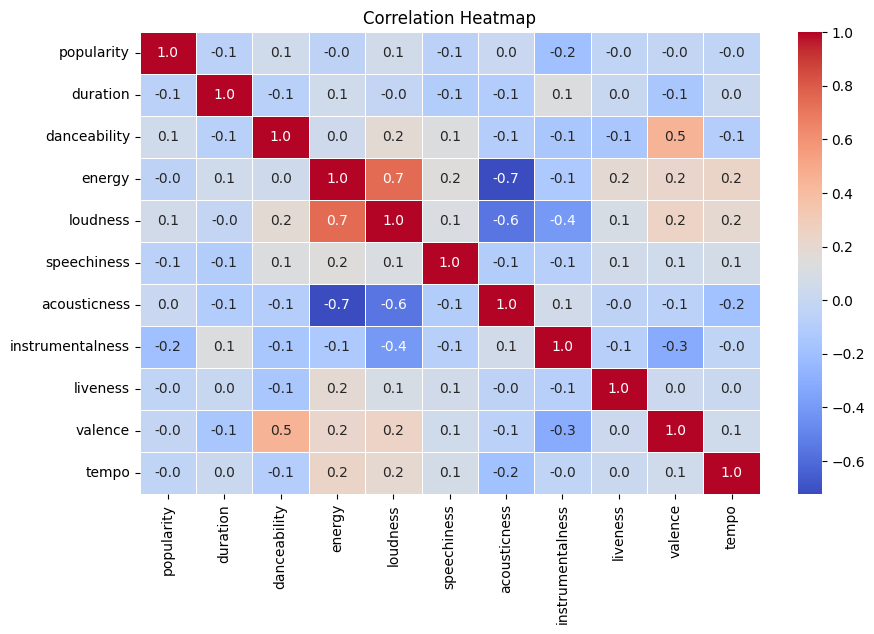

In [16]:
# Defining numerical features
numerical = ['popularity', 'duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=spotipy[numerical].corr(), 
    annot=True, 
    fmt='.1f', 
    linewidth=.5,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

In [17]:
spotipy['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'club', 'country', 'dance', 'dancehall', 'death-metal',
       'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass',
       'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk',
       'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk',
       'house', 'idm', 'indian', 'indie-pop', 'indie', 'industrial',
       'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop',
       'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal',
       'metalcore', 'minimal-techno', 'mpb', 'new-age', 'pagode', 'party',
       'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock',
    

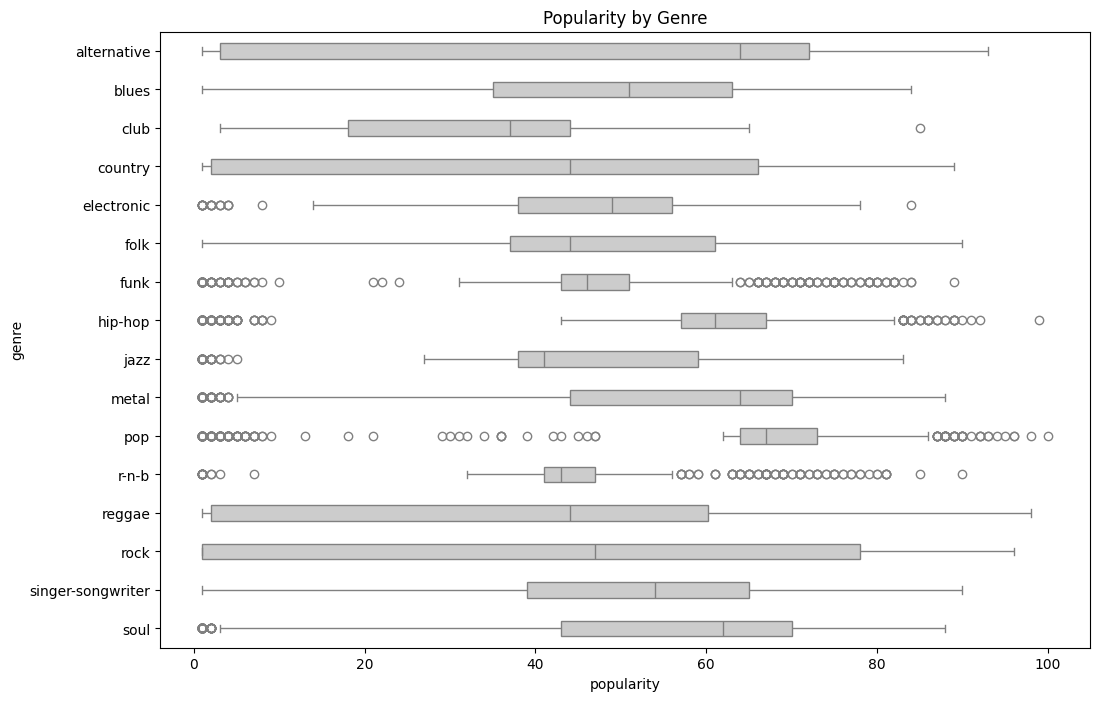

In [18]:
# Defining main genres for simple visualization
mains = ['alternative', 'blues', 'club', 'country', 'electronic', 'folk', 'funk', 'hip-hop', 'jazz', 'metal', 'pop', 'r-n-b', 'reggae', 'rock', 'singer-songwriter', 'soul']

# Creating a boxplot for popularity by genre
plt.figure(figsize=(12, 8))
sns.boxplot(
	data=spotipy[spotipy['genre'].isin(mains)],
	x='popularity',
	y='genre',
    color='.8',
    linecolor='grey',
    gap=.5
)
plt.title('Popularity by Genre')
plt.show()

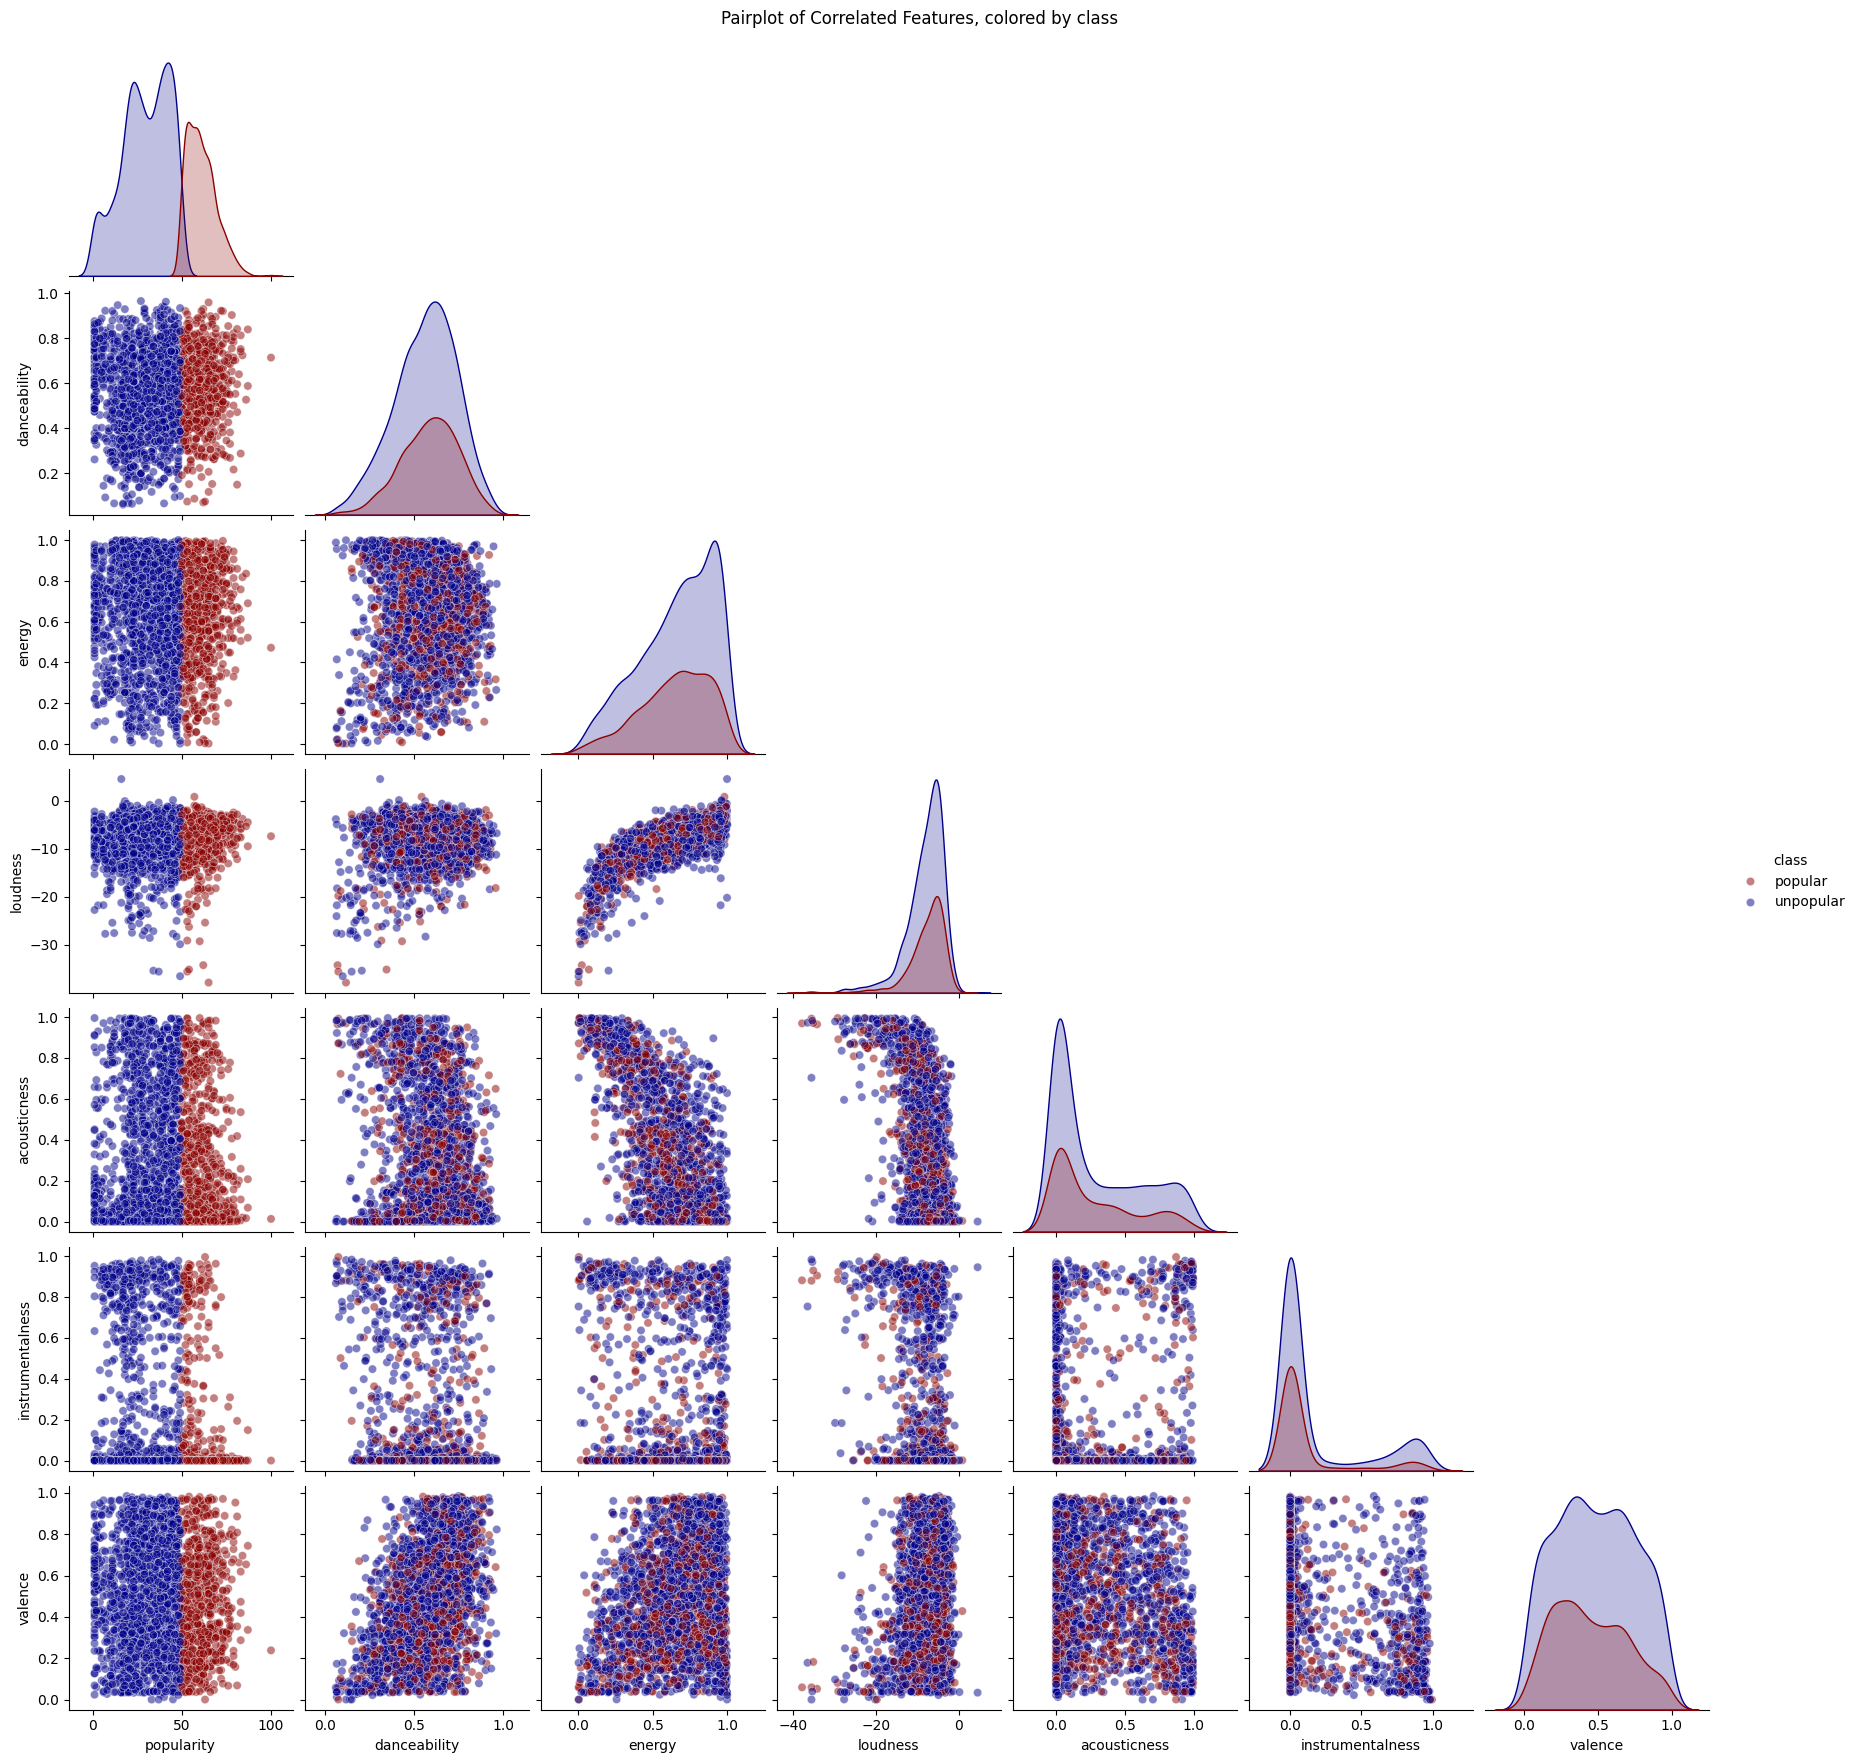

In [19]:
# Creating a binary label for popularity
threshold = spotipy['popularity'].quantile(.70)
spotipy['class'] = spotipy['popularity'].apply(lambda x: 'popular' if x >= threshold else 'unpopular')

# Creating a pairplot for correlated features sorted by class of popularity
correlated = ['popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence']

sns.pairplot(
    data=spotipy[correlated + ['class']].sample(n=2449, random_state=3),
    hue='class',
    palette={'popular': '#8b0000', 'unpopular': '#00008b'},
    plot_kws={'alpha': 0.5},
    corner=True
)
plt.suptitle('Pairplot of Correlated Features, colored by class', y=1.01)
plt.show()

In [20]:
# Saving the cleaned dataset
spotipy.to_csv('spot.csv', index=False)